# Лабораторная работа №2

### Используемые библиотеки

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA as KPCA, SparsePCA as SPCA, FactorAnalysis as FA

### Исходные данные:
[`glass.csv`](https://www.kaggle.com/uciml/glass)

## Загрузка данных

In [38]:
frame = pd.read_csv("glass.csv")
var_names = list(frame.columns)
labels = frame.to_numpy('int')[:,-1]
data = frame.to_numpy('float')[:,:-1]
frame

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [39]:
data = preprocessing.minmax_scale(data)
original = pd.DataFrame(data, columns=var_names[:-1])
original

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


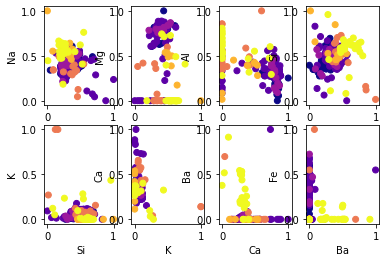

In [40]:
fig, axs = plt.subplots(2, 4)
for i in range(data.shape[1] - 1):
    ax = axs[i // 4, i % 4]
    ax.scatter(data[:,i], data[:,i+1], c=labels, cmap='plasma')
    ax.set_xlabel(var_names[i])
    ax.set_ylabel(var_names[i+1])

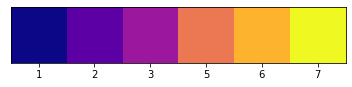

In [41]:
lbl = list(set(labels))
fig, ax = plt.subplots(1, 1)

ax.imshow([lbl], cmap='plasma')
ax.set_yticks([])
ax.set_xticks(range(0, len(lbl)))
ax.set_xticklabels(lbl)

plt.show()

## Метод главных компонент

In [42]:
components = ["component 1", "component 2"]

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)
pd.DataFrame(pca_data, columns=components)

,component 1,component 2
0,-0.402106,0.032707
1,-0.206320,-0.144705
2,-0.188617,-0.194854
3,-0.237208,-0.097064
4,-0.223972,-0.121779
...,...,...
209,0.749082,-0.233155
210,0.732719,-0.225962
211,0.739477,-0.141512
212,0.723704,-0.228558


In [43]:
values = [pca.explained_variance_ratio_, pca.singular_values_]
pd.DataFrame(values, columns=components, index=["explained variance", "eigenvalues"])

,component 1,component 2
explained variance,0.454296,0.179901
eigenvalues,5.104931,3.212457


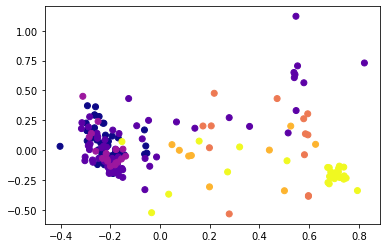

In [44]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap='plasma')
plt.show()

In [45]:
explained = [sum(PCA(n_components=i).fit(data).explained_variance_ratio_) for i in range(0, len(var_names))]
pd.DataFrame(explained, columns=["explained variance %"])

,explained variance %
0,0.000000
1,0.454296
2,0.634197
3,0.760691
4,0.858670
5,0.927294
6,0.969435
7,0.995533
8,0.999861
9,1.000000


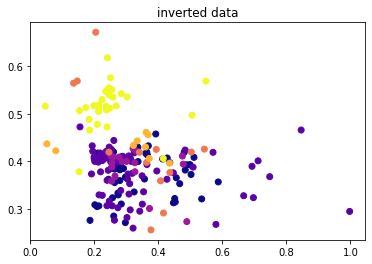

RI                  Na                  Mg                  Al  \
         self     other      self     other      self     other      self   
0    0.413560  0.432836  0.405127  0.437594  0.991335  1.000000  0.228206   
1    0.260258  0.283582  0.420059  0.475188  0.803878  0.801782  0.334469   
2    0.210728  0.220808  0.417649  0.421053  0.784256  0.790646  0.358400   
3    0.283103  0.285777  0.406479  0.372932  0.825200  0.821826  0.307642   
4    0.251520  0.275241  0.399277  0.381955  0.802985  0.806236  0.305859   
..        ...       ...       ...       ...       ...       ...       ...   
209  0.235777  0.223003  0.547346  0.512782 -0.030546  0.000000  0.681190   
210  0.255351  0.250219  0.550793  0.630075 -0.017736  0.000000  0.652575   
211  0.302867  0.417032  0.535668  0.545865 -0.035828  0.000000  0.614824   
212  0.224560  0.235294  0.530193  0.548872 -0.028102  0.000000  0.632925   
213  0.246087  0.261633  0.539982  0.526316 -0.033763  0.000000  0.648592   

                     Si                   K                  Ca            \
        other      self     other      self     other      self     other   
0    0.252336  0.337820  0.351786  0.064268  0.009662  0.315113  0.308550   
1    0.333333  0.512633  0.521429  0.087301  0.077295  0.243815  0.223048   
2    0.389408  0.564974  0.567857  0.095590  0.062802  0.215681  0.218401   
3    0.311526  0.504755  0.500000  0.080058  0.091787  0.264735  0.259294   
4    0.295950  0.560916  0.583929  0.077654  0.088567  0.258397  0.245353   
..        ...       ...       ...       ...       ...       ...       ...   
209  0.806854  0.509672  0.500000  0.132409  0.012882  0.288575  0.348513   
210  0.529595  0.504071  0.580357  0.120813  0.000000  0.305012  0.276022   
211  0.538941  0.491007  0.644643  0.105099  0.000000  0.354692  0.279740   
212  0.514019  0.577042  0.678571  0.113836  0.000000  0.307516  0.283457   
213  0.557632  0.531597  0.633929  0.118911  0.000000  0.310339  0.296468   

           Ba                  Fe        
         self     other      self other  
0    0.006391  0.000000 -0.008878   0.0  
1    0.019321  0.000000 -0.013243   0.0  
2    0.012166  0.000000 -0.000087   0.0  
3   -0.000243  0.000000  0.008153   0.0  
4   -0.026301  0.000000  0.003014   0.0  
..        ...       ...       ...   ...  
209  0.368020  0.336508  0.012621   0.0  
210  0.352229  0.504762 -0.038937   0.0  
211  0.332143  0.520635 -0.020359   0.0  
212  0.302185  0.498413 -0.025100   0.0  
213  0.335967  0.530159 -0.015586   0.0  

[214 rows x 18 columns]

In [46]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(data)
inv = pca.inverse_transform(pca_data)
plt.scatter(inv[:,0], inv[:,1], c=labels, cmap='plasma')
plt.title("inverted data")
plt.show()
pd.DataFrame(inv, columns=var_names[:-1]).compare(original)

In [47]:
solvers = ('full', 'arpack', 'randomized')
solvation = []

for solver in solvers:
    sol_pca = PCA(svd_solver=solver).fit(data)
    solvation.append((sol_pca.n_components_, sum(sol_pca.explained_variance_ratio_), sol_pca.noise_variance_))

pd.DataFrame(solvation, columns=["components", "explained variance %", "noise variance"], index=solvers)

,components,explained variance %,noise variance
full,9,1.000000,0.000000
arpack,8,0.999861,0.000038
randomized,9,1.000000,0.000000


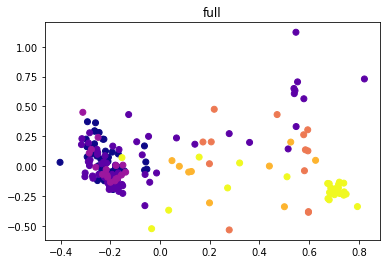

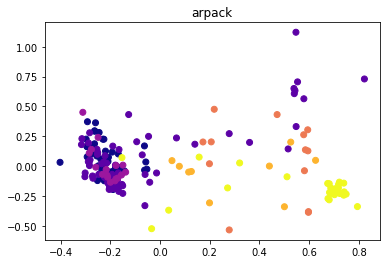

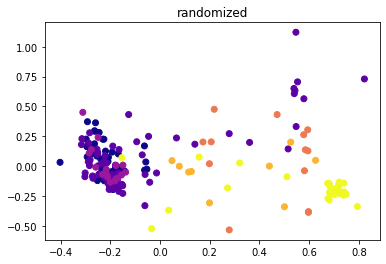

In [48]:
for solver in solvers:
    sol_pca_data = PCA(svd_solver=solver, n_components=2).fit_transform(data)
    plt.scatter(sol_pca_data[:,0], sol_pca_data[:,1], c=labels, cmap='plasma')
    plt.title(solver)
    plt.show()

## Модификации метода главных компонент

In [49]:
kernels = {
    'linear': [],
    'poly': ['gamma', 'degree', 'coef0'],
    'rbf': ['gamma'],
    'sigmoid': ['gamma', 'coef0'],
    'cosine': []
}
params = {
    'gamma': [None, 0, 0.3, 0.6, 1],
    'degree': [0, 45, 90, 180, 10000],
    'coef0': [0, 0.3, 0.6, 1]
}
solvation = []
inverse = []

for kernel in kernels:
    kernel_params = [{}]
    for param in kernels[kernel]:
        param_list = []
        for i in range(0, len(kernel_params)):
            kp = kernel_params.pop(0)
            for value in params[param]:
                param_list.append(kp.copy() | {param: value})
        kernel_params = param_list

    for kernel_param in kernel_params:
        try:
            kpca = KPCA(kernel=kernel, kernel_params=kernel_param, fit_inverse_transform=True).fit(data)
            kpca_data = kpca.transform(data)

            inv = pd.DataFrame(pd.DataFrame(kpca.inverse_transform(kpca_data), columns=var_names[:-1]).mean()).mean()[0]
            solvation.append([len(kpca.eigenvalues_), inv])
        except ValueError:
            solvation.append([None, None])

df = pd.DataFrame(solvation, columns=["components", "inverse delta"]).drop_duplicates()
df.index = kernels
df

,components,inverse delta
linear,9.0,4.577652e-17
poly,177.0,3.051952e-01
rbf,201.0,3.051932e-01
sigmoid,NaN,NaN
cosine,9.0,5.897440e-02


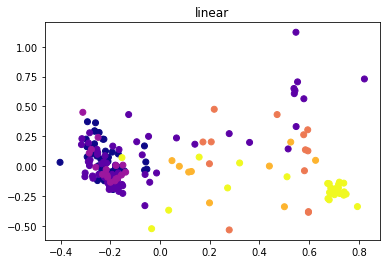

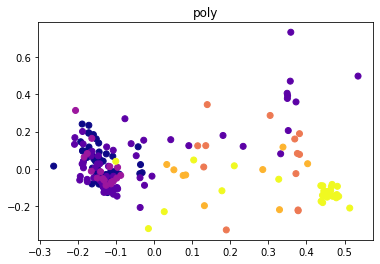

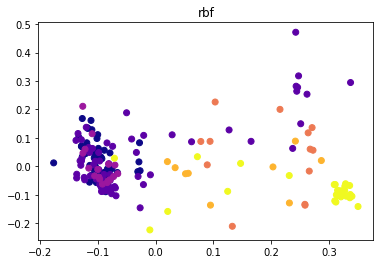

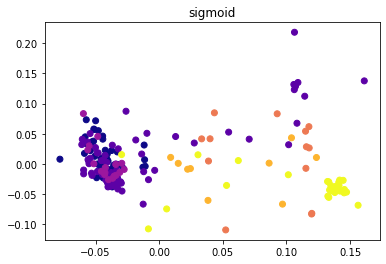

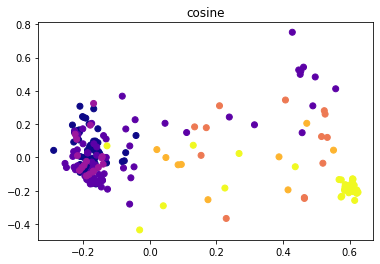

In [50]:
for kernel in kernels:
    kpca_data = KPCA(kernel=kernel, n_components=2).fit_transform(data)
    plt.scatter(kpca_data[:,0], kpca_data[:,1], c=labels, cmap='plasma')
    plt.title(kernel)
    plt.show()

In [51]:
alphas = (0.001, 0.3, 0.6, 1)
methods = ('lars', 'cd')
combinations = []
solvation = []

for a in alphas:
    for m in methods:
        combinations.append(f"a: {a}, m: {m}")
        spca = SPCA(alpha=a, method=m).fit(data)
        solvation.append([spca.n_components_, spca.n_iter_])

pd.DataFrame(solvation, columns=["components", "iterations"], index=combinations)

,components,iterations
"a: 0.001, m: lars",9,1000
"a: 0.001, m: cd",9,1000
"a: 0.3, m: lars",9,21
"a: 0.3, m: cd",9,24
"a: 0.6, m: lars",9,8
"a: 0.6, m: cd",9,7
"a: 1, m: lars",9,13
"a: 1, m: cd",9,14


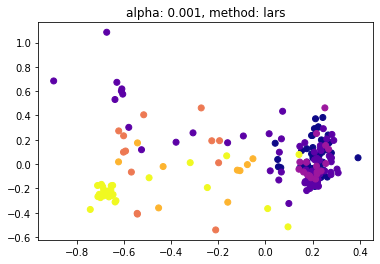

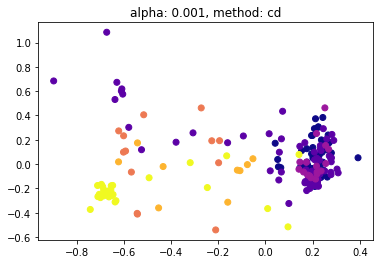

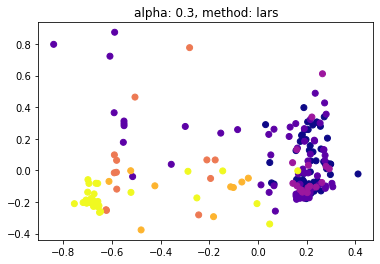

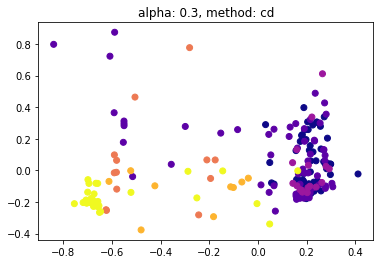

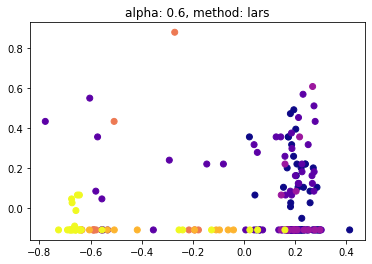

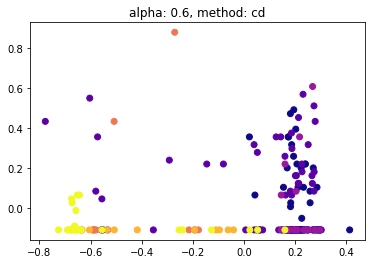

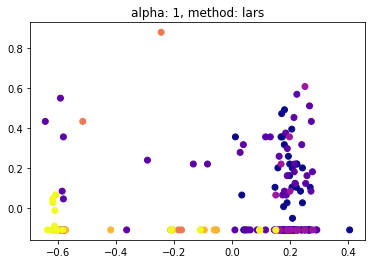

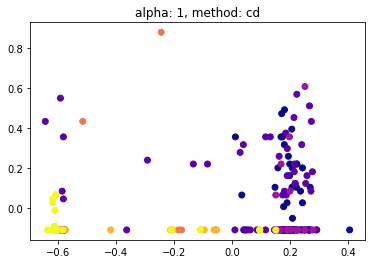

In [52]:
for a in alphas:
    for m in methods:
        spca_data = SPCA(alpha=a, method=m, n_components=2).fit_transform(data)
        plt.scatter(spca_data[:,0], spca_data[:,1], c=labels, cmap='plasma')
        plt.title(f"alpha: {a}, method: {m}")
        plt.show()

In [53]:
methods = ('lapack', 'randomized')
solvation = []

for m in methods:
    fa = FA(svd_method=m).fit(data)
    solvation.append([len(fa.components_), fa.n_iter_])

pd.DataFrame(solvation, columns=["components", "iterations"], index=methods)

,components,iterations
lapack,9,2
randomized,9,2


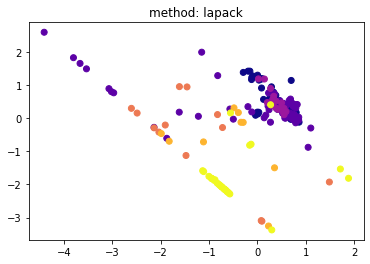

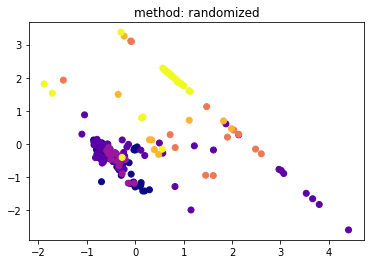

In [54]:
for m in methods:
    fa_data = FA(svd_method=m, n_components=2).fit_transform(data)
    plt.scatter(fa_data[:,0], fa_data[:,1], c=labels, cmap='plasma')
    plt.title(f"method: {m}")
    plt.show()